<div class = "alert alert-info" >
<b>Приветствие</b>

Антон, приветствую тебя!
    
Меня зовут Дарья. Надеюсь, ты не против, если мы будем общаться на "ты"? Если тебя это смущает - дай знать!
    
Я немного припоздала с отправкой декомпозиции: на работе был завал (закрытие этапа), пришлось немного изменить свой план. Надеюсь наверстать упущенное время и успеть сдать проект вовремя.
    
Свои комментарии на замечания ревьюеров я, обычно, оставляю в синих блоках (таких, как этот). Если для тебя будет удобнее, чтобы я использовала другой цвет, то тоже - дай знать!

Есть вопрос по проекту: надо ли анализировать пользователей по оттоку? Или это задача другой группы?
</div>

<div class='alert alert-success'>
Здравствуй, Дарья!

У тебя получился отличный план. Мне понравилось что ты так детально описала последовательность своих шагов. Отток является важным признаком, поэтому его можно брать во внимание. В целом эта работа направлена на то, чтобы студент проявил самостоятельность и выделил те факторы для анализа которые ему покажутся наиболее важными. 

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Спасибо, я рада, что у меня первое задание получилось с первого раза. Надеюсь, не последнее. Но проект точно не с первого. Сейчас я отправляю тебе только ноутбук с кодом и отчётом. Хочу получить рекомендации и учесть твои замечания. После - прикреплю ссылку на презентацию и дашборд.
Маленькая просьба: сильно не душни, пожалуйста?)))))
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Постаралась поправить все твои замечания. Можно сказать, проект изменился. Что-то побороть у меня не получилось - это больше про автоматизацию графиков, но зато они теперь выглядят подобающе для презентации. Все правки в тексте <span style="color:blue">выделены таким образом.</span>
</div>

# Сегментация пользователей по потреблению для разработки стратегии взаимодействия с клиентами

**Заказчик:**

Региональное отделение банка «Метанпромбанк» в Ярославской области.

**Цель исследования:**

* сегментировать клиентов регионального банка по количеству потребляемых продуктов для разработки предложений клинтам с целью удержания.

**Исходные данные:**

Файл с данными о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Задачи:**

* подготовка данных к анализу;
* исследовательский анализ данных (EDA);
* сегментация пользователей;
* формулировка и проверка статистических гипотез;
* формулировка выводов и базовых рекомендаций по работе с клиентами.

## Материалы:
* [Презентация](https://disk.yandex.ru/i/eVqWBW2sgIwCZQ)
* [Дашборд](https://public.tableau.com/app/profile/daria2993/viz/ClientsSegmentationforRegionalBank/Dashboard1?publish=yes)

<div class='alert alert-success'>
Дашборд принят, соответствует всем критериям!

<div class='alert alert-success'>
Презентация весьма информативная, у тебя достаточно хорошо получилось соблюсти баланс текстовой и графической информации. В целом из рекомендаций по улучшению могу советовать делать более емкие по содержанию графики чтобы появлялось поле для описания и интерпретации. Для этого отлично подходят графики типа виолончель.

## Оглавление <a id='Оглавление'></a>

### Подготовка данных к анализу
* [Загрузка библиотек](#1)
* [Загрузка и подготовка данных к анализу](#2)
* [Проверка и обработка пропущенный значений](#3)
* [Проверка и обработка дубликатов](#4)

### Исследовательский анализ данных (EDA)
* [Средние значения и стандартные отклонения](#5)
* [Матрица корреляции признаков](#6)

### Сегментация пользователей
* [Сегментация пользователей по количеству потребляемых продуктов](#7)

### Формулировка и проверка статистических гипотез
* [Гипотеза № 1 (о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним)](#8)
* [Гипотеза № 2 (о различии дохода между теми клиентами, которые пользуются двумя двумя и менее продуктами банка, и теми, которые используют более двух)](#9)

### Общий вывод и рекомендации
* [Выводы и базовые рекомендации по работе с клиентами](#10)

## Подготовка данных к анализу
<a id='1'></a>
### Загрузка библиотек 
[*Назад к оглавлению*](##Оглавление)

Импортируем все необходимые для решения поставленных задач библиотеки.

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import os
import phik

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(16,9)})
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

<a id='2'></a>
### Загрузка и подготовка данных к анализу
[*Назад к оглавлению*](##Оглавление)

Прочитаем файлы *.csv* и сохраним в переменные.

In [2]:
path = 'bank_dataset.csv'
if os.path.exists(path):
    path = 'bank_dataset.csv'
else:
    path = '/datasets/bank_dataset.csv'
    
bank_dataset = pd.read_csv(path)

<div class='alert alert-warning'>
конструкции вида X == True лучше не писать, если у тебя по дефолту и так хранится либо True либо False, то нет нужды еще раз делать сравнение, просто пишешь if x: /тело условия/
    
Также для такой консутрции лучше использовать консутркцию обработки исключений try: except: тогда тебе даже не нужно проверять с помощью специальных функций существует ли путь.

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Так это должно выглядеть, я правильно поняла?
</div>

<div class='alert alert-success'>
Да, все верно

Ознакомимся с данными в таблице *bank_dataset* и выведем ощую информацию.

In [3]:
# Выведем таблицу с данными о действиях пользователей или событиях
display(bank_dataset.head())

# Выведем общую информацию
bank_dataset.info()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,nan,1,1,1,"101,348.88",1
1,15690047,608,Рыбинск,Ж,41,1,"83,807.86",1,0,1,"112,542.58",0
2,15662040,502,Ярославль,Ж,42,8,"159,660.80",3,1,0,"113,931.57",1
3,15744090,699,Ярославль,Ж,39,1,nan,2,0,0,"93,826.63",0
4,15780624,850,Рыбинск,Ж,43,2,"125,510.82",1,1,1,"79,084.10",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Файл *bank_dataset* содержит следующие данные о клиентах банка «Метанпром»:

- `userid` — идентификатор пользователя (тип данных - *int64*);
- `score` — баллы кредитного скоринга (тип данных - *int64*);
- `City` — город (тип данных - *object*);
- `Gender` — пол (тип данных - *object*);
- `Age` — возраст (тип данных - *int64*);
- `Objects` — количество объектов в собственности (тип данных - *int64*);
- `Balance` — баланс на счёте (тип данных - *float64*);
- `Products` — количество продуктов, которыми пользуется клиент (тип данных - *int64*);
- `CreditCard` — есть ли кредитная карта (тип данных - *int64*);
- `Loyalty` — активный клиент (тип данных - *int64*);
- `estimated_salary` — заработная плата клиента (тип данных - *float64*);
- `Churn` — ушёл или нет (тип данных - *int64*).

В датасете присутствуют пропущенные значения - в столбце *balance*. Но для начала приведем названия столбцов к нижнему регистру для удобства, а также переведем категориальные переменные в количественные, для дальнейшего анализа.

In [4]:
# Приводим названия столбцов к нижнему регистру

bank_dataset.columns = bank_dataset.columns.str.lower()

# В столбце 'gender' изменим значения на числовые, а также выделим столбец с числовыми значениями городов 

bank_dataset['gender'] = bank_dataset['gender'].map({'М':1, 'Ж':0})
bank_dataset['city_integer'] = bank_dataset['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})

# Преобразуем датафрейм методом get_dummies(), чтобы разделить столбец 'city' на отдельные столбцы для каждого города

bank_dataset = pd.get_dummies(bank_dataset)
bank_dataset.head()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,city_integer,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,0,42,2,nan,1,1,1,"101,348.88",1,0,0,0,1
1,15690047,608,0,41,1,"83,807.86",1,0,1,"112,542.58",0,1,0,1,0
2,15662040,502,0,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0,0,1
3,15744090,699,0,39,1,nan,2,0,0,"93,826.63",0,0,0,0,1
4,15780624,850,0,43,2,"125,510.82",1,1,1,"79,084.10",0,1,0,1,0


<div class='alert alert-success'>
Все отлично, очень круто делаешь one-hot кодировку признаков – для исследования корреляций и построения модели именно её и нужно использовать. Но при построении модели нужно еще помнить про одну деталь. Чтобы избежать мультиколлинеарности (на самом деле ситуация редкая, но это хороший тон при разработке), тебе нужно дропать лишний признак городов. Тогда у тебя получится вектора [0, 1], [1, 0], [0, 0] которые тоже однозначно будут кодировать твои исходные категории.

Отлично: все наименования столбцов приведены к нижнему регистру, категориальные переменные переведены в количественные.

<a id='3'></a>
### Проверка и обработка пропущенных значений
[*Назад к оглавлению*](##Оглавление)

Изучим пропущенные значения.

In [5]:
print('Всего пропусков в столбце `balance`: {}.'.format(bank_dataset.isna().sum().sort_values(ascending=False)[0]))
print('Пропущено {}% значений в столбце `balance`.'.format((bank_dataset.isna().sum().sort_values(ascending=False)[0])*100/len(bank_dataset)))

Всего пропусков в столбце `balance`: 3617.
Пропущено 36.17% значений в столбце `balance`.


Скорее всего пропуски в столбце `balance` вызваны техническими сбоями при выгрузке данных. Для проверки этого предположения посмотрим на распределение значений по столбцу.

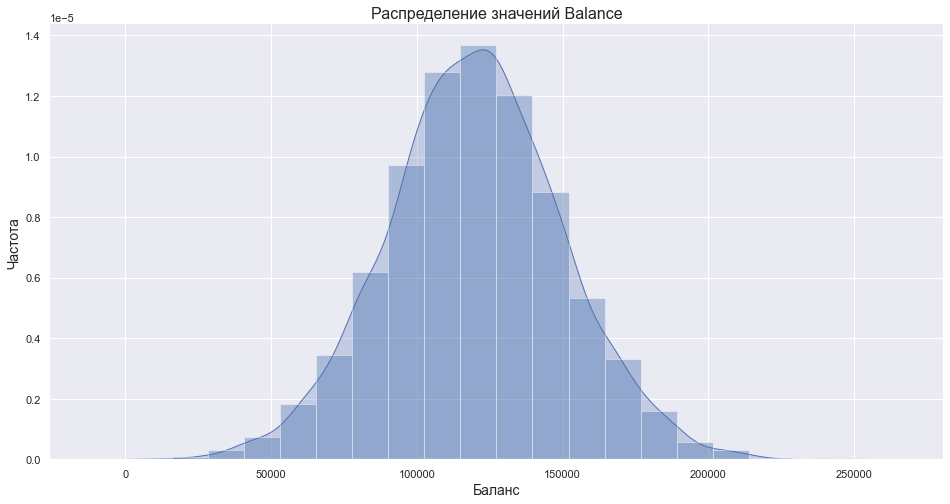

In [6]:
plt.figure(figsize=(16, 8))
plt.title('Распределение значений Balance', fontsize=16)
sns.despine(left=True)
sns.distplot(bank_dataset['balance'], hist=True, kde_kws={"shade": True}, bins=20)
plt.xlabel('Баланс', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.show()

Данные распределены нормально, выбросов нет - похоже на сбой.

В дальнейшем мы будем проводить сегментацию пользователей по количесвту продуктов. Посмотрим, как распределяются пропуски в балансе, относительно количества продуктов.

<div class='alert alert-warning'>
Для наглядности лучше сразу считать абсолютные и относительные величины, к тому же ты посмотрела только в разрезе продуктов. Если посмотреть например в разрезе городо то ты увидишь другую картину.

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Принято и поправлено. Воспользовалась предложенным тобою способом.
</div>

In [7]:
bank_dataset.groupby('products').agg({'balance': [lambda x: sum(x.isna()), lambda x: sum(x.isna()) / x.shape[0]]})

balance           
         <lambda_0> <lambda_1>
products                      
1            905.00       0.18
2          2,600.00       0.57
3             98.00       0.37
4             14.00       0.23

Больше половины значений столбца `balance` у пользователей с двумя продуктами пропущено. <span style="color:blue">Посмотрим на распределение пропусков в балансе относительно городов.</span>

In [8]:
bank_dataset.groupby('city_integer').agg({'balance': [lambda x: sum(x.isna()), lambda x: sum(x.isna()) / x.shape[0]]})

balance           
             <lambda_0> <lambda_1>
city_integer                      
0              2,418.00       0.48
1              1,199.00       0.48
2                  0.00       0.00

<span style="color:blue">Пропуски в столбе `balance` отсутствуют у клиентов из Ростова Великого. Заполнение пропусков создаст выбросы. Возможно, отсутсвие баланса является фактом отсутствия у клиента дебетового счёта, а не ошибкой в выгрузке. Оставим пропущенные значения как есть.</span>

<div class='alert alert-warning'>
Тк пропуски присутствуют только в некоторых городах, то ты с помощью заполнения создаешь выбросы. Помимо ошибок в выгрузке обычно баланс отсутствует у тех кто пользуется продуктом который не предполагает дебетового счета. Вообще заполнение пропусков для аналитики совсем не обязательно, наоборот это вносит искажения в данных и выводыы получается смещенными. Заполнение пропусков нужно для моделирования

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Принято и поправлено.
</div>

<a id='4'></a>
### Проверка и обработка дубликатов
[*Назад к оглавлению*](##Оглавление)

Посмотрим, что с дубликатами.

In [9]:
print ('Количество дубликатов:', len(bank_dataset) - len(bank_dataset.drop_duplicates()))
print ('Доля дубликатов: {:.2%}'.format((len(bank_dataset) - len(bank_dataset.drop_duplicates())) / len(bank_dataset)))

Количество дубликатов: 0
Доля дубликатов: 0.00%


Прекрасно: в таблице нет повторяющихся значений.

<div style="border:solid Blue 2px; padding: 10px">
<h3> Вывод <a class="tocSkip"> </h3>
    
<br/>
    
Данные готовы для дальнейших операций по решению поставленных в исследовании задач и проведения исследовательского анализа:

<ul>    
<li>все наименования столбцов приведены к нижнему регистру;</li>
  
<li>категориальные переменные переведены в количественные;</li>

<li>пропущенные значения в столбце <mark>balance</mark> <span style="color:blue">оставлены без изменений, чтобы не создавать выбросов</span>;</li>
    
<li>дубликатов в датасете не обнаружено.</li>
<br/>

## Исследовательский анализ данных (EDA)
<a id='5'></a>
### Средние значения и стандартные отклонения
[*Назад к оглавлению*](##Оглавление)

Посмотрим на датасет: изучим средние значения и стандартные отклонения. Предварительно исключим из таблицы столбец `userid`: он содержит уникальные идентификаторы пользователей - средние значения не являются валидной информацией.

In [10]:
bank_dataset.drop(['userid'], axis=1).describe().round().T

,count,mean,std,min,25%,50%,75%,max
score,"10,000.00",651.00,97.00,350.00,584.00,652.00,718.00,850.00
gender,"10,000.00",1.00,0.00,0.00,0.00,1.00,1.00,1.00
age,"10,000.00",39.00,10.00,18.00,32.00,37.00,44.00,92.00
objects,"10,000.00",5.00,3.00,0.00,3.00,5.00,7.00,10.00
balance,"6,383.00","119,827.00","30,095.00","3,769.00","100,182.00","119,840.00","139,512.00","250,898.00"
products,"10,000.00",2.00,1.00,1.00,1.00,1.00,2.00,4.00
creditcard,"10,000.00",1.00,0.00,0.00,0.00,1.00,1.00,1.00
loyalty,"10,000.00",1.00,0.00,0.00,0.00,1.00,1.00,1.00
estimated_salary,"10,000.00","100,090.00","57,510.00",12.00,"51,002.00","100,194.00","149,388.00","199,992.00"
churn,"10,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00


Из представленных данных видно:
* основная часть заёмщиков имеет кредитный скоринг в диапазоне 554 до 748 баллов, что говорит о разбросе благонадежности клиентов: от удовлетворительной оценки кредитной истории (в этом случае уловия кредитования диктует банк), до отличной оценки - но, в целом клиенты имеют стандартный балл и общие условия кредитования;
* в целом, мужчин больше, чем женщин;
* в среднем клиенты владеют от двух до восьми объетов в собственности;
* баланс счёта большинства находится в диапазоне от 95 до 143 тыс. рублей;
* большая часть клиентов пользуется одним продуктом;
* большинство из клиентов - владельцы кредитных карт;
* в большинстве клиенты активно пользуются продуктами банка;
* средний заработок клиентов составляет 100 тыс. рублей;
* клиенты чаще остаются, чем уходят;
* больше всего клиентов у банка из регионального центра - Ярославля.

Рассмотрим более подробно средние значения показателей в разрезе групп по количеству, используемых продуктов.

In [11]:
# используем describe() для вывода среднего по группам количества продуктов
bank_dataset.drop(['userid'], axis=1).groupby('products').describe().T.reset_index().query('level_1 == "mean"')\
.set_index('level_0').drop(['level_1'], axis = 1)

products,1,2,3,4
level_0,,,,
score,649.12,652.19,648.11,653.58
gender,0.55,0.55,0.44,0.37
age,39.67,37.75,43.20,45.68
objects,4.97,5.05,5.00,5.30
balance,"119,894.16","119,660.94","119,475.69","122,260.61"
creditcard,0.70,0.71,0.71,0.68
loyalty,0.50,0.53,0.42,0.48
estimated_salary,"99,487.26","100,452.01","104,318.13","104,763.72"
churn,0.28,0.08,0.83,1.00


Из полученной таблицы видно, что:
* клиенты, пользующиеся одним или двумя продуктами банка, в среднем являются представителями обоих полов в примерно равных долях (с небольшим перевесом в сторону мужчин), в возрасте моложе 40 лет, заработком около 100 тыс. рублей, в половине своей активно используют банковские продукты и, в основном, жители Ярославля;
* клиенты из групп с тремя и четырьмя продуктами в большинстве женщины старше 40 лет, с заработной платой чуть выше 100 тыс. рублей, проживающие как Ярославле, так и в других городах области, но, что характерно, большинство расторгают свои отношения с банком (особенно те, у кого четыре продукта - показатель оттока 100 %).

### Матрица корреляций признаков
<a id='6'></a>
[*Назад к оглавлению*](##Оглавление)

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Добавила раздел с исследованием корреляции признаков, как и обсудили.
</div>

<div class='alert alert-success'>
Очень круто выглядит, гораздо более интересные взаимосвязи удалось извлечь. Только city_integer там лишний

<div class="alert alert-info"> <b>Комментарий студента v3:</b> Принято и поправлено.
</div>

<span style="color:blue">Посмотрим, есть ликакая-то взаимосвязь между признаками. Выведем для этого матрицу корреляций: так как мы будем иметь дело с корреляционной матрицей переменных со смешанными типами (категориальные и количественные), воспользуемся матрицей коэффициентов phi_k (он работает последовательно между категориальными, порядковыми и интервальными переменными, а также, фиксирует нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае двухвариантного нормального распределения входных данных.)</span>

interval columns not set, guessing: ['score', 'gender', 'age', 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']


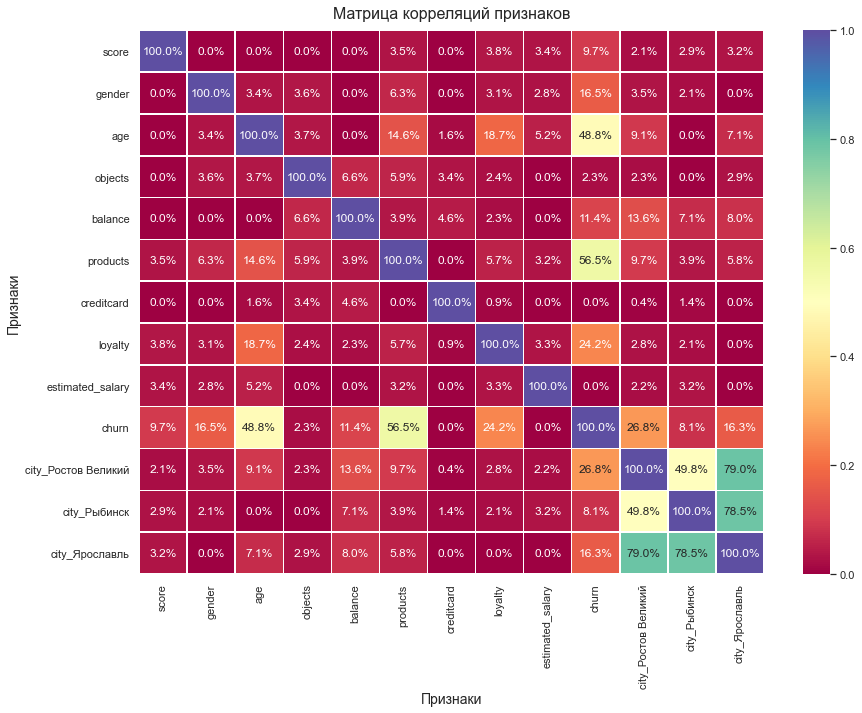

In [12]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(bank_dataset.drop(['userid', 'city_integer'], axis=1).phik_matrix(), annot = True, fmt = '0.1%', linewidths=.5, cmap="Spectral")
heatmap.set_title('Матрица корреляций признаков', fontdict={'fontsize':16}, pad=12)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Признаки', fontsize=14)
plt.show()

<span style="color:blue">Мультиколлинеарности не обнаружено (кроме созданных столбцов с городами из одного общего), все признаки незначительно коррелируют друг с другом.</span>

<span style="color:blue">Из матрицы заметно, что есть взаимосвязь у `churn` с `products`, `age`, `city_Ростов Великий`, `loyalty` и `gender`.
А `products` сильнее всего коррелирует с `churn`, `age` и `city_Ростов Великий`.</span>

<span style="color:blue">Рассмотрим распределение клиентов внутри сегментов по количеству потребляемых продуктов.</span>

<div style="border:solid Blue 2px; padding: 10px">
<h3> Вывод <a class="tocSkip"> </h3>
    
<br/>
    
<li>Клиенты, имеющие больше двух банковских продуктов:</li>
<ol>
    
<li>чаще уходят и являются менее активными пользователями;</li>
<li>старше 40 лет;</li>
<li>реже пользуютя кредитными картами.</li>
    
</ol>
    
<br/>
    
<li>Клиенты, использующие один или двапродукта:

<ol>
    
<li>более лояльны и активны;
<li>моложе;
<li>кредитная карта - привычный для них продукт.</li>
    
</ol>
 
<li><span style="color:blue">Существует взаимосвязь между количеством продуктов у клиента с возрастом, а самое важное, с вероятностью его ухода.
<br/>

## Сегментация пользователей
<a id='7'></a>
### Сегментация пользователей по количеству потребляемых продуктов
[*Назад к оглавлению*](##Оглавление)

Рассмотрим более подробно поведение клиентов в разрезе групп по количеству используемых продуктов.

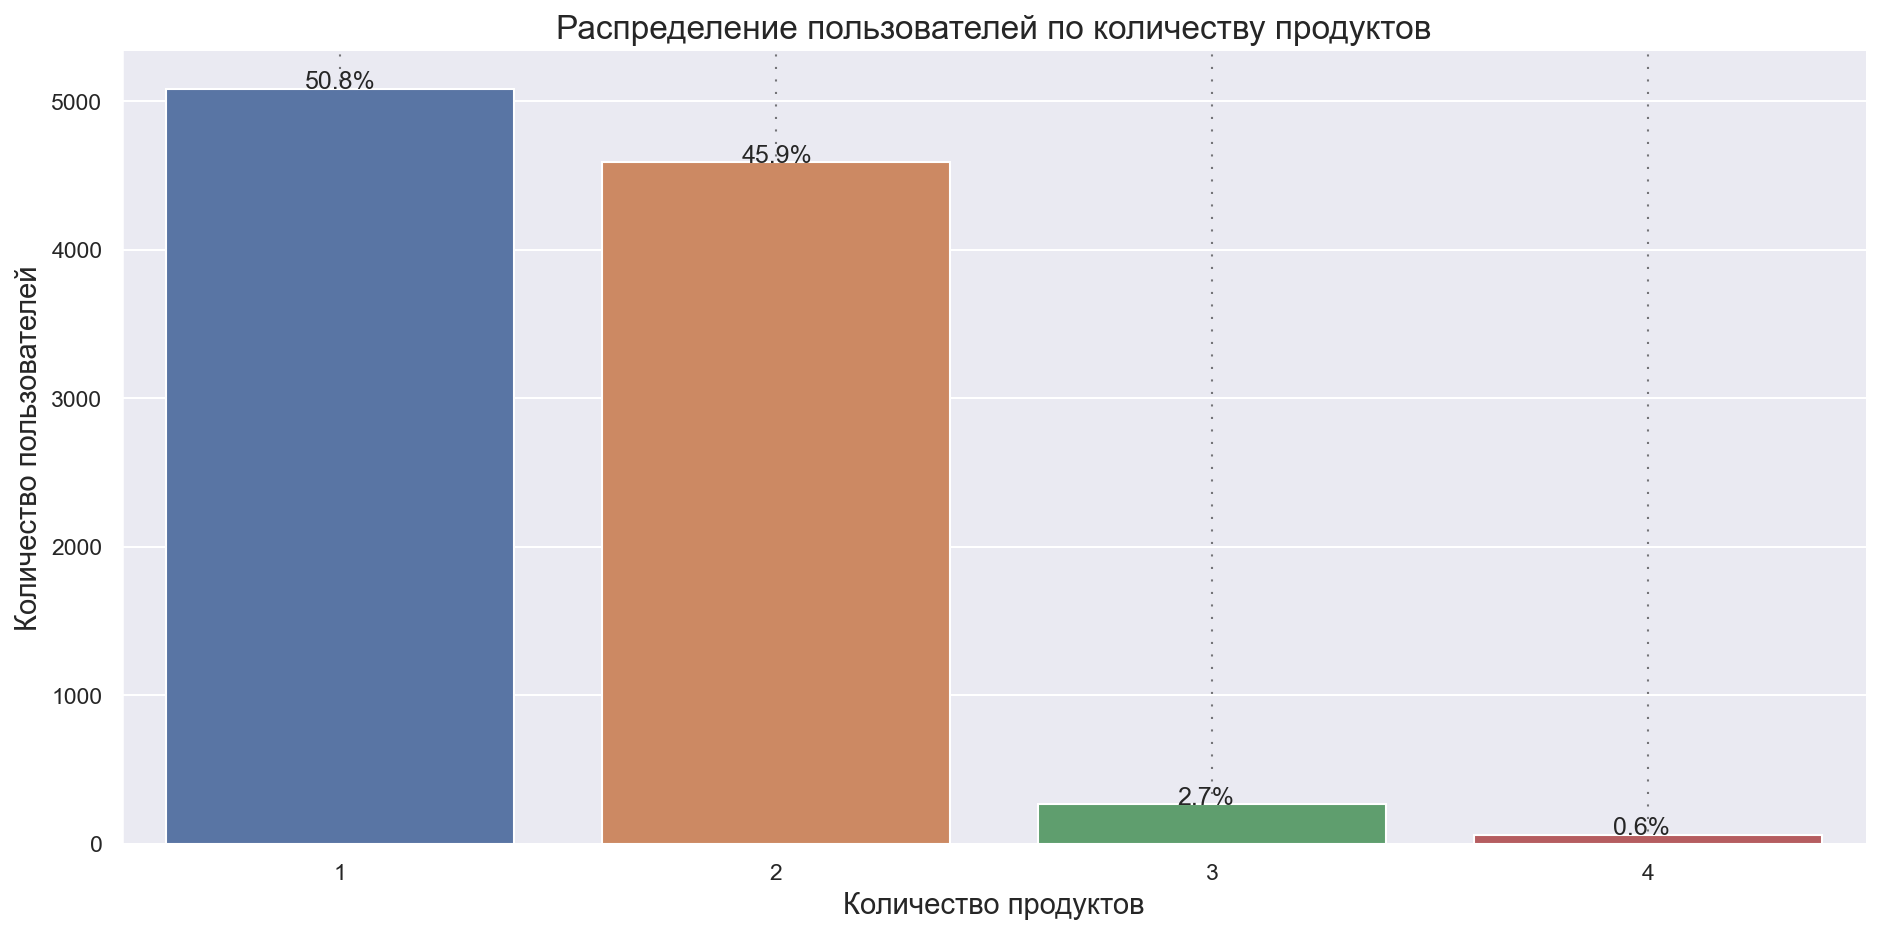

In [13]:
fig = plt.figure(figsize=(15, 7), dpi=150)
ax = sns.countplot(x = 'products', data = bank_dataset)
total = bank_dataset['products'].shape[0]
ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax.set_title('Распределение пользователей по количеству продуктов', fontsize=16)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2.5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

ax.set_xlabel('Количество продуктов', fontsize=14)
ax.set_ylabel('Количество пользователей', fontsize=14)
sns.despine()
plt.show()

Больше всего клиентов пользуются одним продуктом. Меньше всего - четырьмя.

Для начала оценим, категориальные признаки в разрезе сегментов по количеству продуктов, такие как: город, пол, наличие кредитной карты и лояльность. Данные по оттоку выведем отдельно.

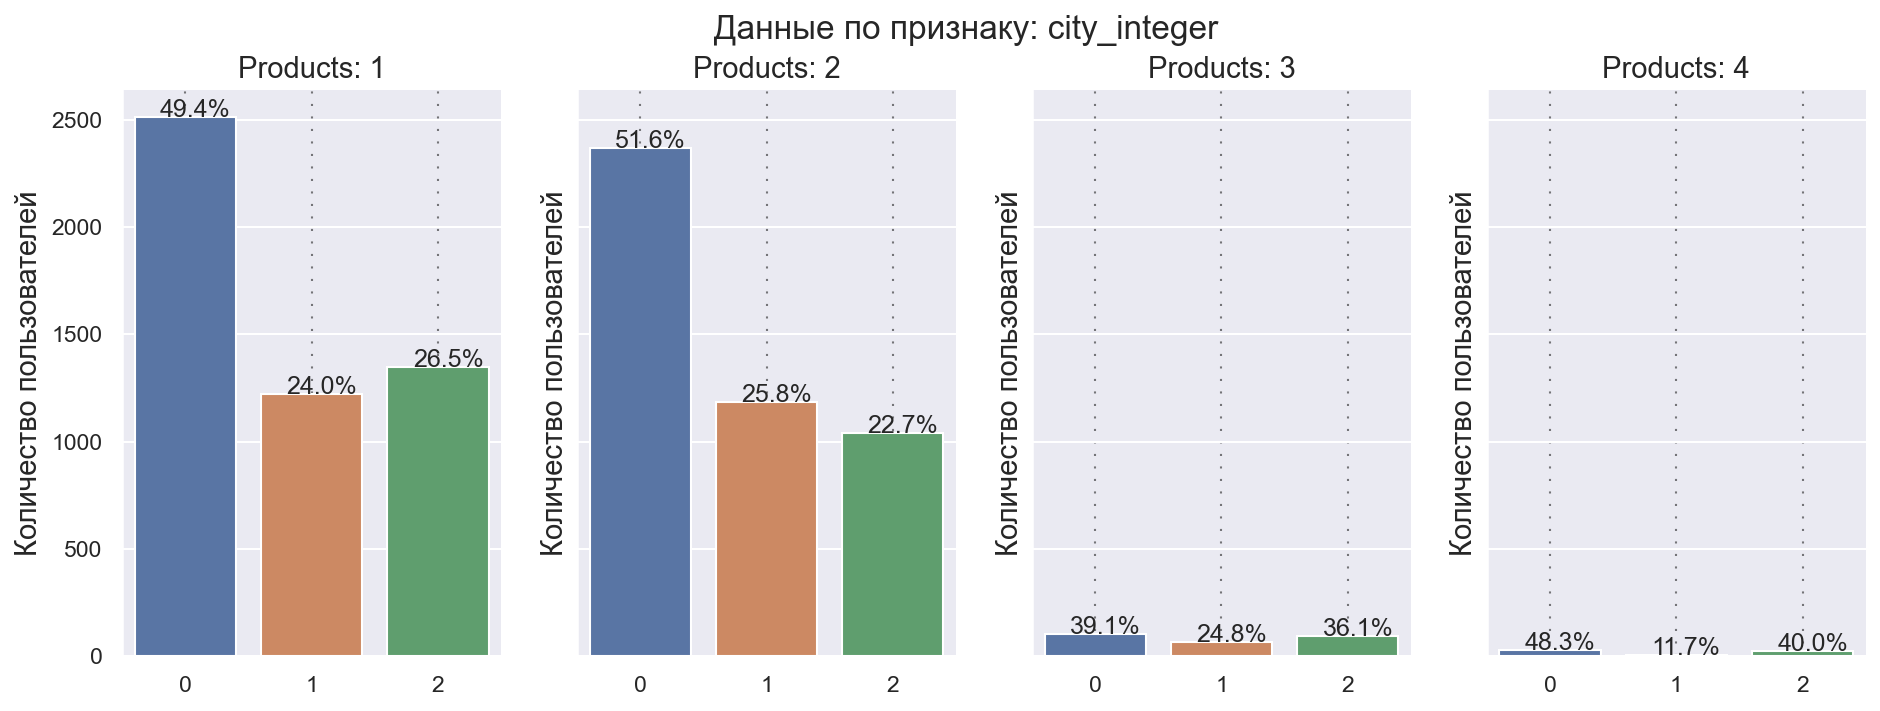

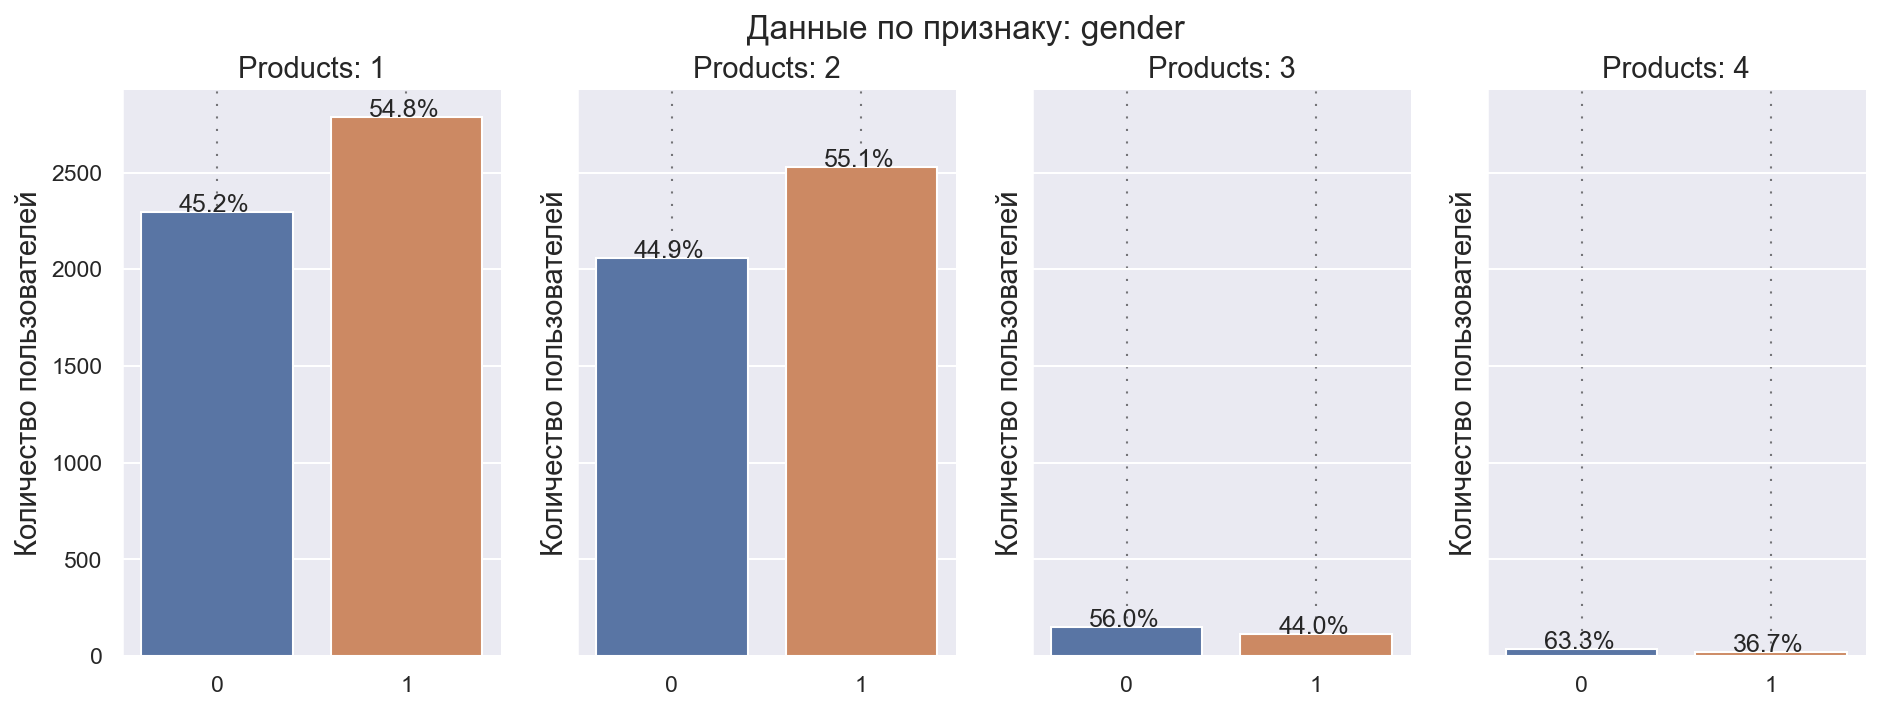

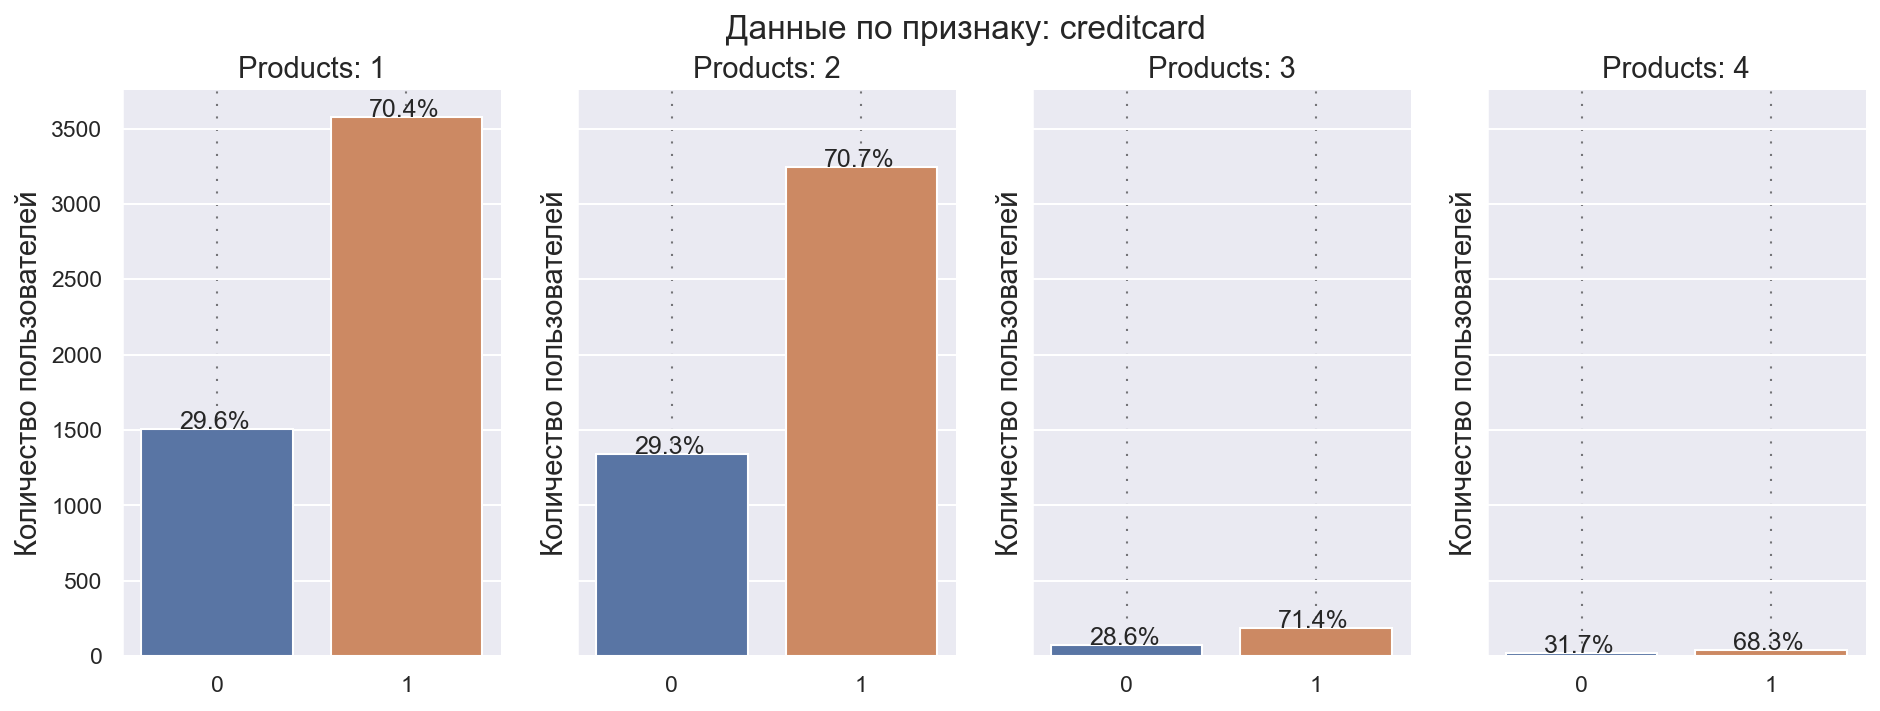

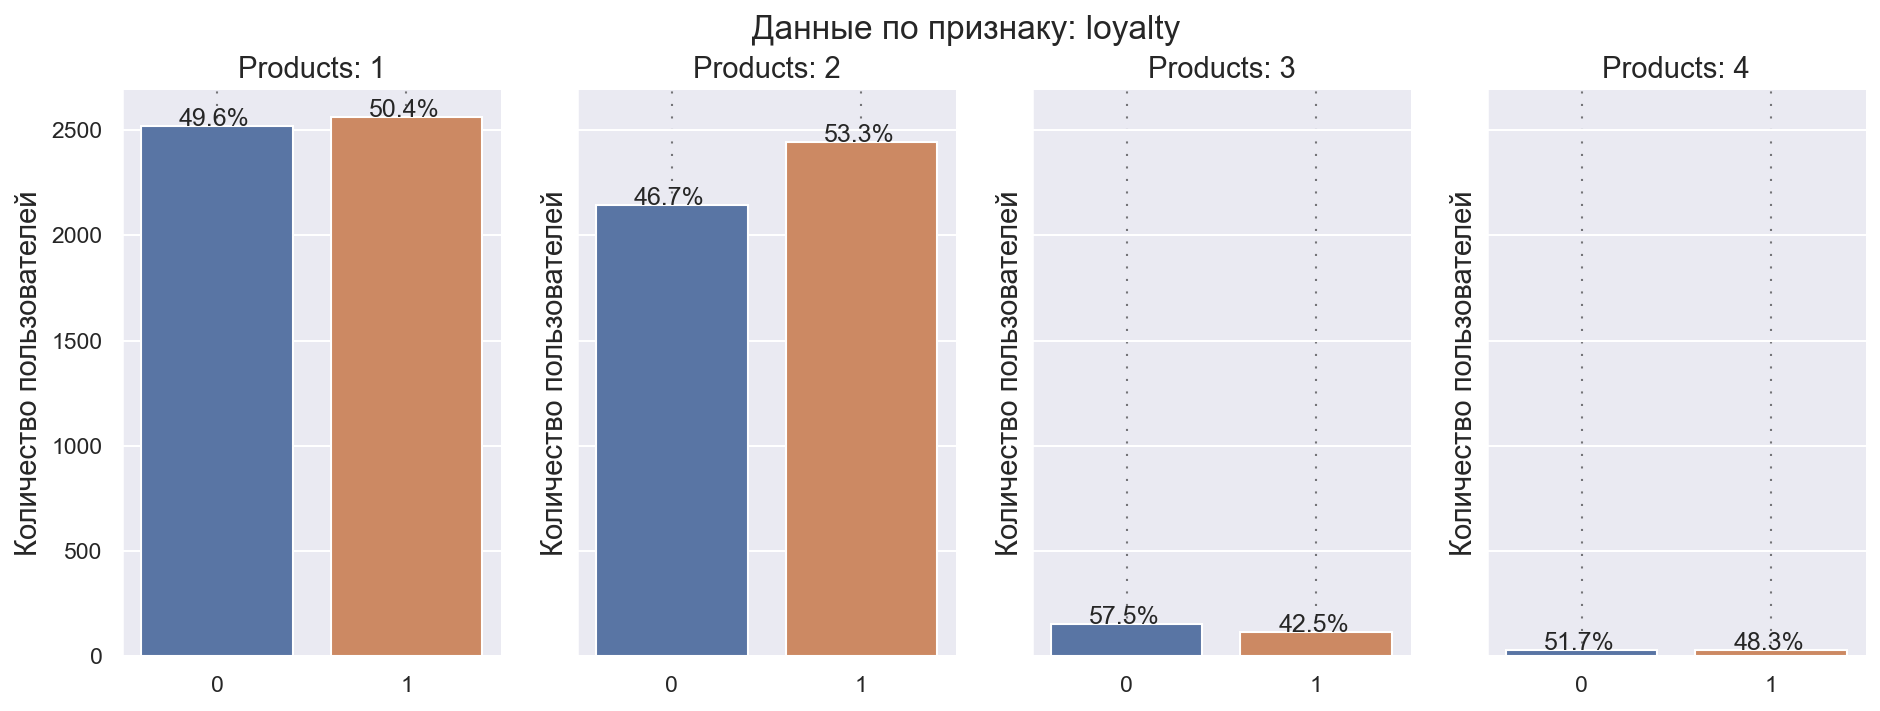

In [14]:
columns = ['city_integer', 'gender', 'creditcard', 'loyalty']
for col in columns:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), dpi=150, sharey=True, sharex=True)
    fig.suptitle('Данные по признаку: ' + col, fontsize=16)
    ax = sns.countplot(x = col, data = bank_dataset[bank_dataset['products']==1], ax=axes[0])
    total = bank_dataset[bank_dataset['products']==1][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 1', fontsize=14)
    ax = sns.countplot(x = col, data = bank_dataset[bank_dataset['products']==2], ax=axes[1])
    total = bank_dataset[bank_dataset['products']==2][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 2', fontsize=14)
    ax = sns.countplot(x = col, data = bank_dataset[bank_dataset['products']==3], ax=axes[2])
    total = bank_dataset[bank_dataset['products']==3][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 3', fontsize=14)
    ax = sns.countplot(x = col, data = bank_dataset[bank_dataset['products']==4], ax=axes[3])
    total = bank_dataset[bank_dataset['products']==4][col].shape[0]
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 4
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y))
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('Количество пользователей', fontsize=14)
    ax.set_title('Products: 4', fontsize=14)
    sns.despine()
    plt.show()

<span style="color:blue">По общему количеству клиентов лидирует Ярославль (это ожидаемо: Ярославль - региональный центр). На втором месте - Ростов Великий, замыкает рейтинг - Рыбинск. Больше всего пользователей в каждом из городов - с одним продуктом. Доля клиентов тремя и более продуктами очень мала одинаково во всех городах.
    
<span style="color:blue">Пользователями с одним и двумя продуктами в боьшинстве являются мужчины, а с тремя и четырьмя - наоборот: чаще - это женщины.

<span style="color:blue">Кредитная карта - одинаково популярный продукт для каждого сегмента.
    
<span style="color:blue">Более активными клиентами являются пользователи одного или двух банковских продуктов. Самый плохой показатель активности у клиентов с тремя продуктами.
    
<span style="color:blue">Посмотрим на распределение показателей оттока, в зависимости от количества продуктов. 

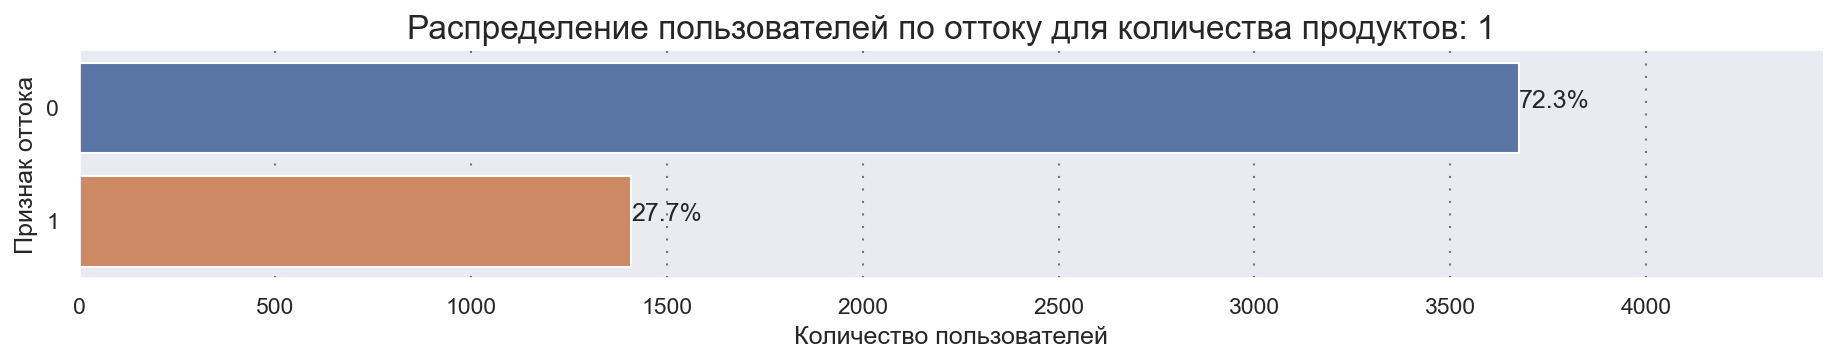

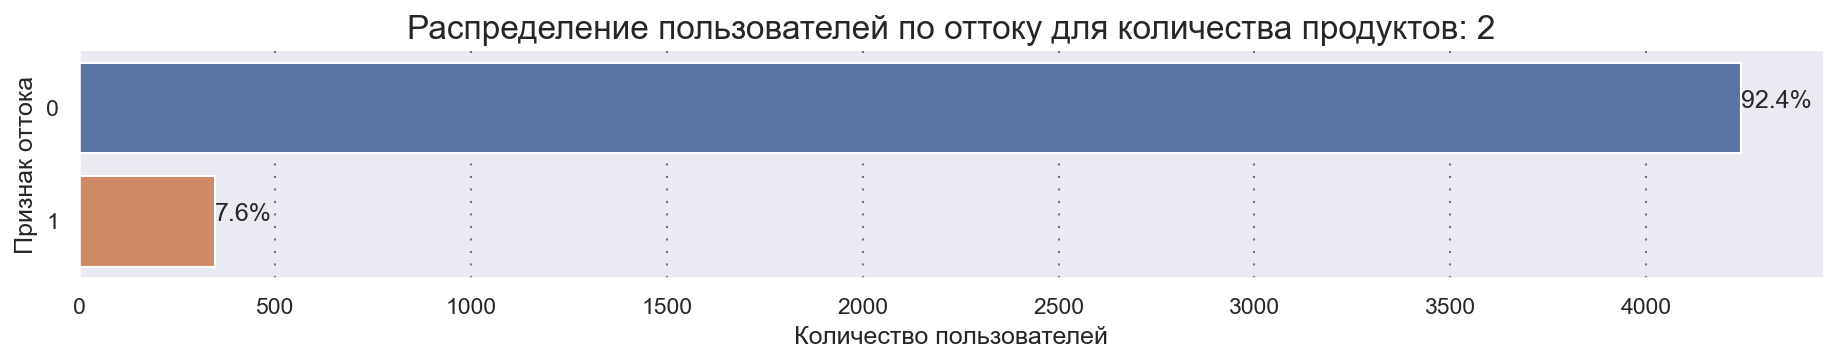

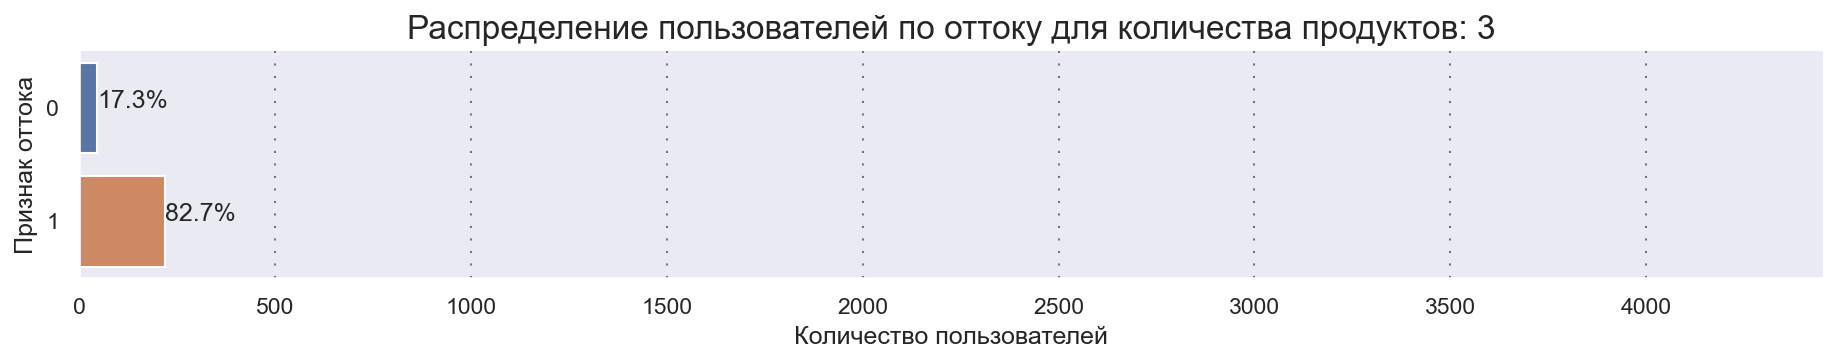

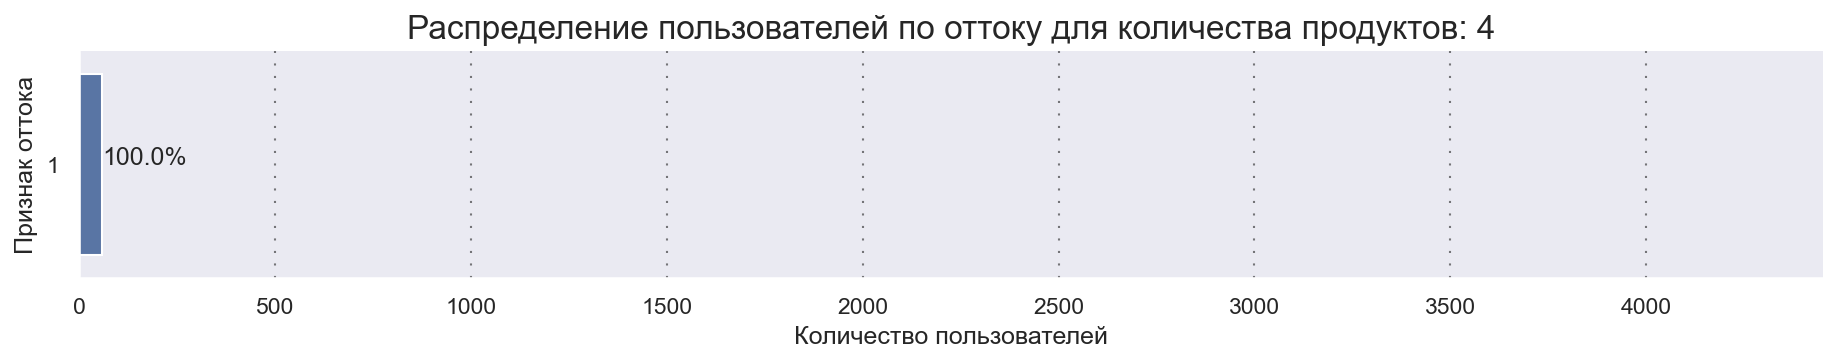

In [15]:
for i in [1, 2, 3, 4]:
    fig = plt.figure(figsize=(15, 2), dpi=150)
    ax = sns.countplot(y='churn', data=bank_dataset[(bank_dataset['products'] == i)])
    total = bank_dataset[bank_dataset['products'] == i].shape[0]
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    ax.set_title('Распределение пользователей по оттоку для количества продуктов: {}'.format(i), fontsize=16)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    ax.set_xlabel('Количество пользователей')
    ax.set_ylabel('Признак оттока')
    ax.set_xlim([0, 4450])
    sns.despine()
    plt.show()

<span style="color:blue">Первое, что бросается в глаза - показатель оттока у клиентов с четырьмя продуктами составляет 100 %. Не далеко ушли и пользователи с тремя продуктами. Меньше всего этот показатель у клиентов с двумя продуктами.
    
<span style="color:blue">Рассмотрим количественные показатели, такие как `score`, `age`, `objects`, `balance` и `estimated_salary`.

<div class='alert alert-warning'>
В целом графики весьма аккуратые, очень здорово что умеешь пользоваться общей осью это очень облегчает восприятие информации. Но в коде выведения графиков очень много копипаста, внутри лучше делать подцикл который бы позволил сократить число строк. Также города в one-hot кодировке на графиках получаются совершенно нечитаемыми, эти два столбца непонятно как воспринимать, тут нужно просто на исходных данных сделать группировку и посчитать размеры групп, вывести также на одном графике – пример ожидаемой визуализации https://seaborn.pydata.org/examples/grouped_barplot.html 
    
Обрати внимание на ось density – она отображает вообще непонятно что. Для плотности должно выполняться условие единичной нормировки, то сумма высот столцов должна давать единицу. На размеры групп тоже не похоже, количество элементов в каждой группе гораздо больше. 
    
Для порядковых дискретных признаков на оси присутствуют лишние отметки которые вводят в заблуждение смотрящего, не должны быть отметки в виде 2.5 продукта на оси, создается впечателение что масштаб графика не позволяет рассмотреть наличие данных в данном столбце. 
    
Также лишней является аппроксимирующая кривая, она никак не помогает понять котегориальные данные. Её хорошо строить каких-то непрерывных данных чтобы визуально оценить билзость к нормальному распределению, в остальных случаях она бесполезна.
    
В целом данные графики более чем годны для личного ознакомления, но использовать их в презентации или отдавать внешним пользователям нельзя.

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Типы графиков и их отображение пришлось изменить.
</div>

<div class='alert alert-success'>
Здесь все отлично, очень круто что ты вывела проценты. В совокупности со шкалой абсолютных значений это очень помогает воспринимать информацию.

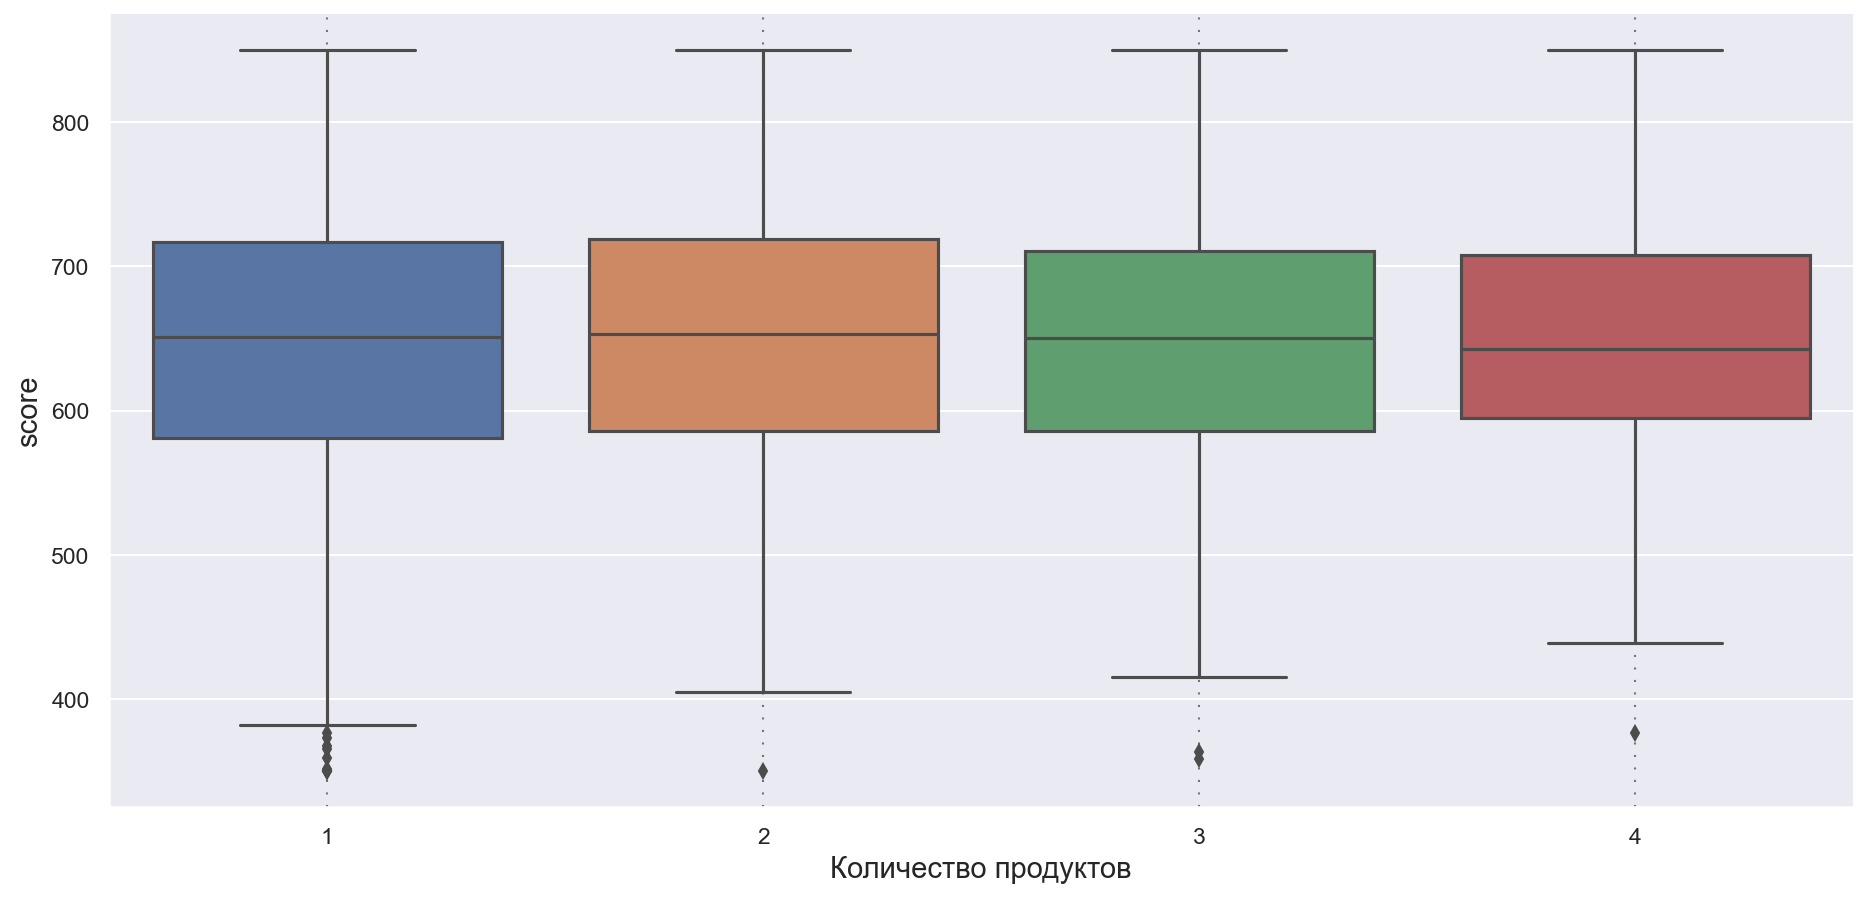

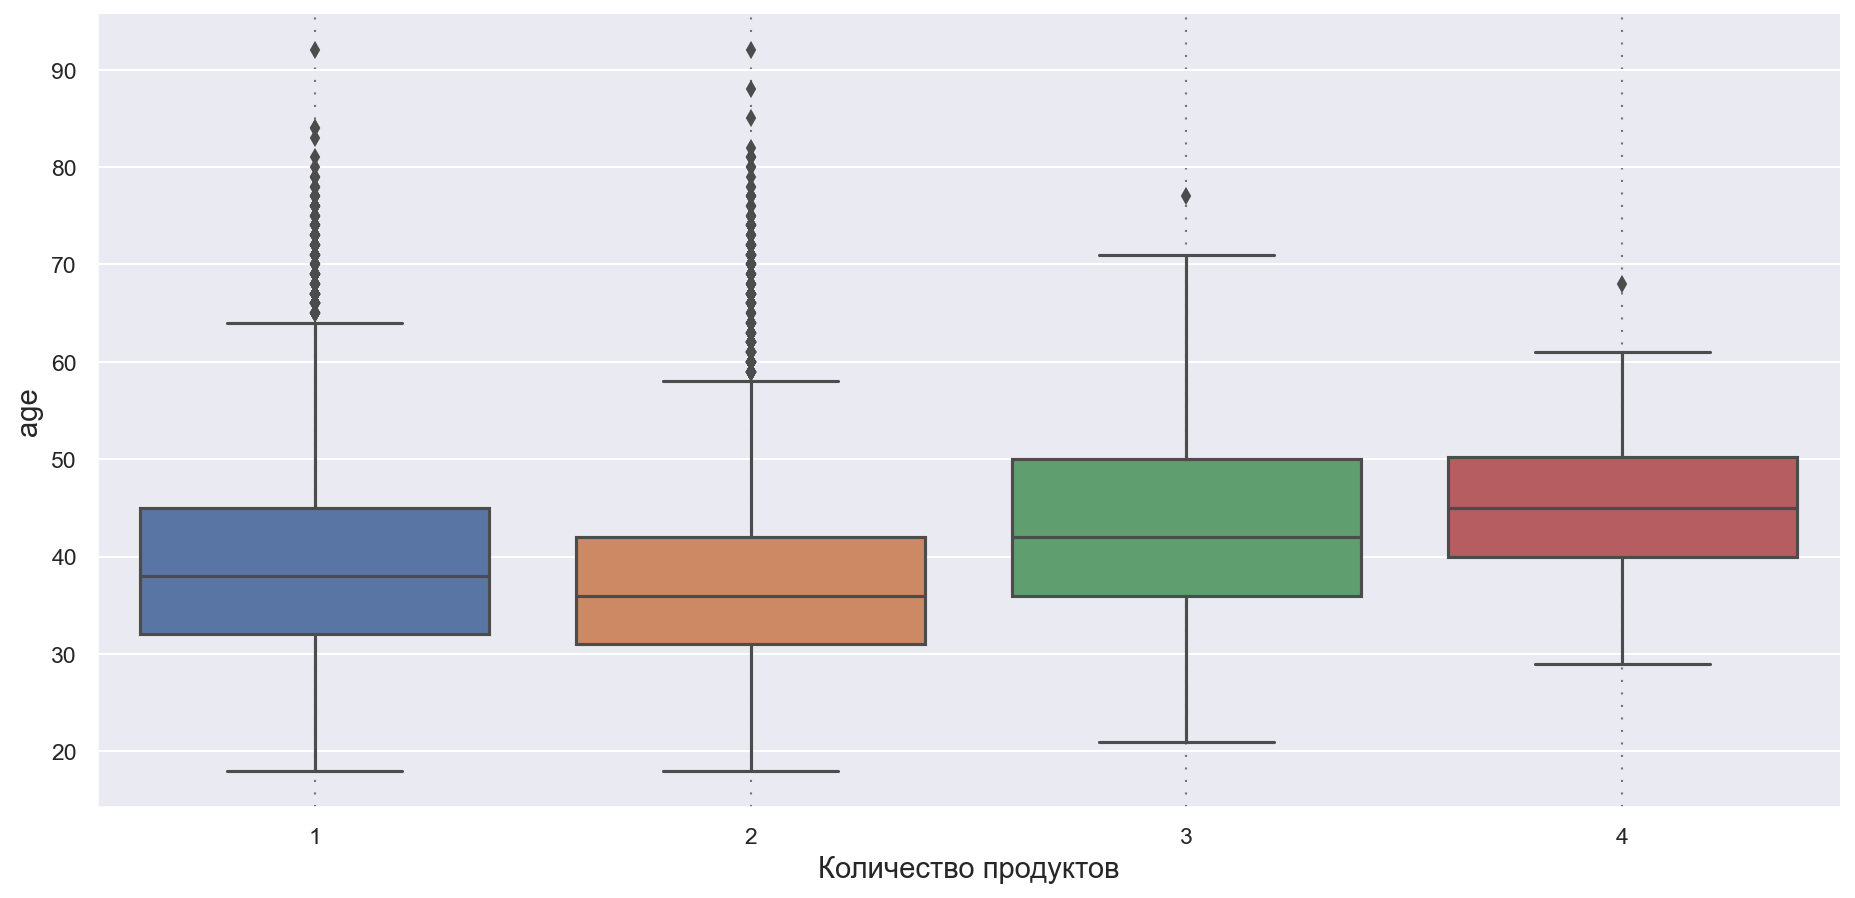

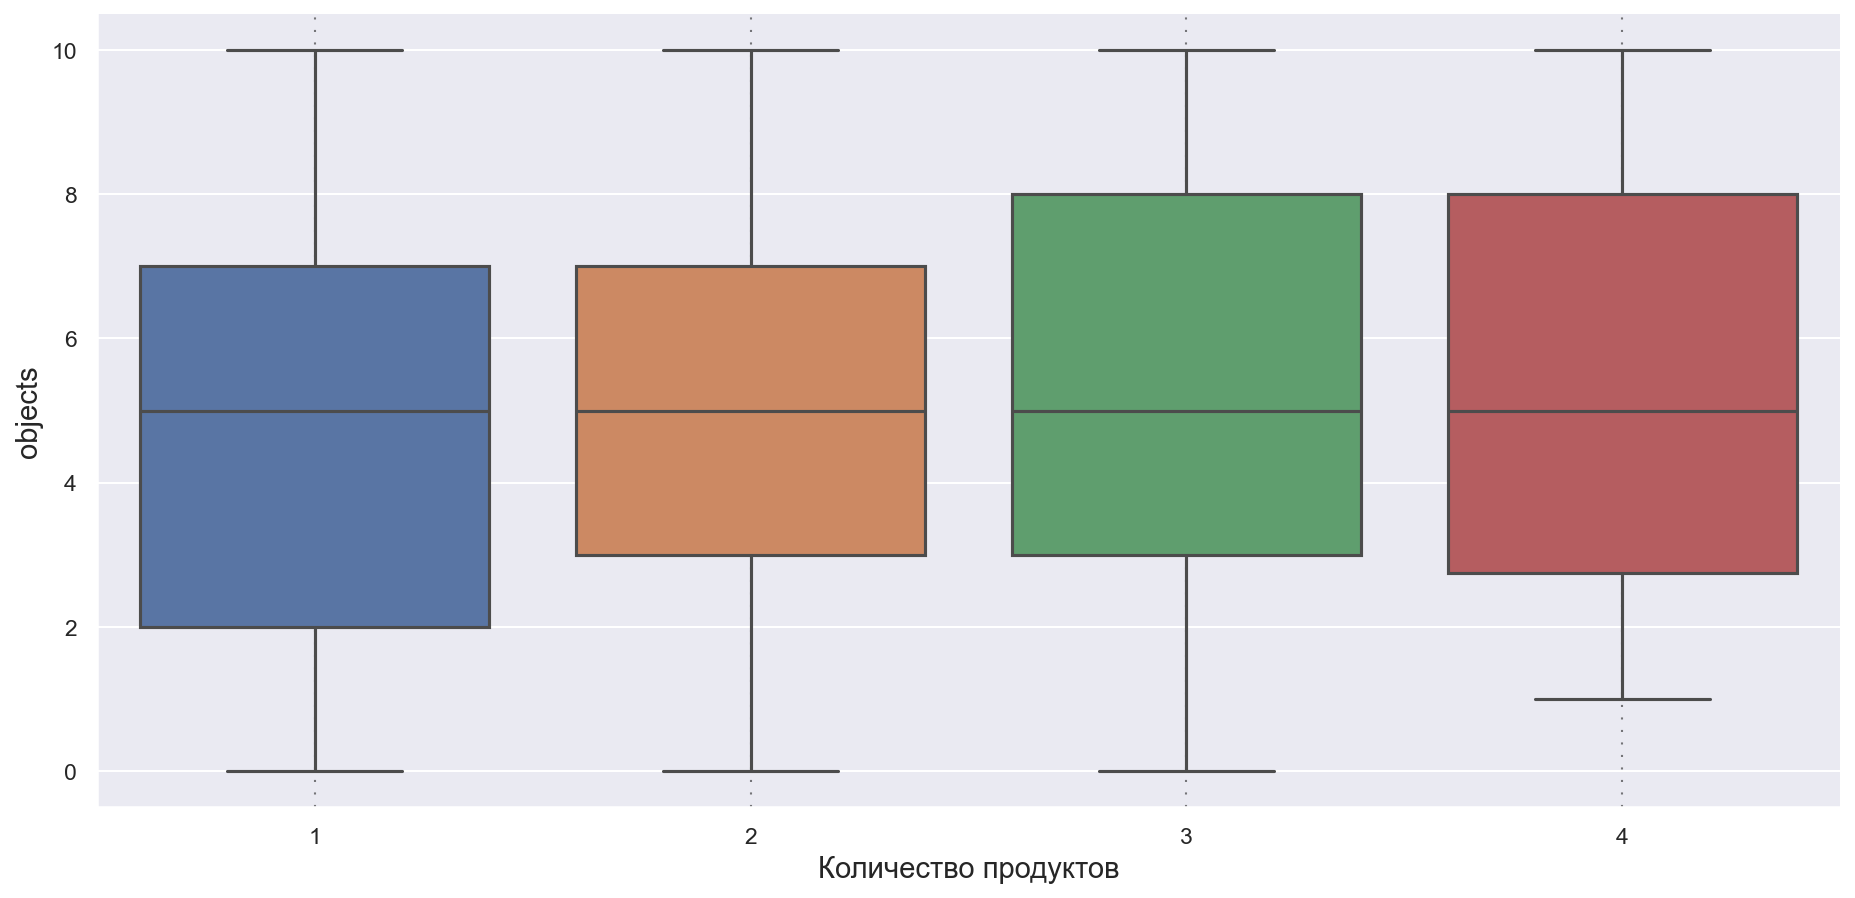

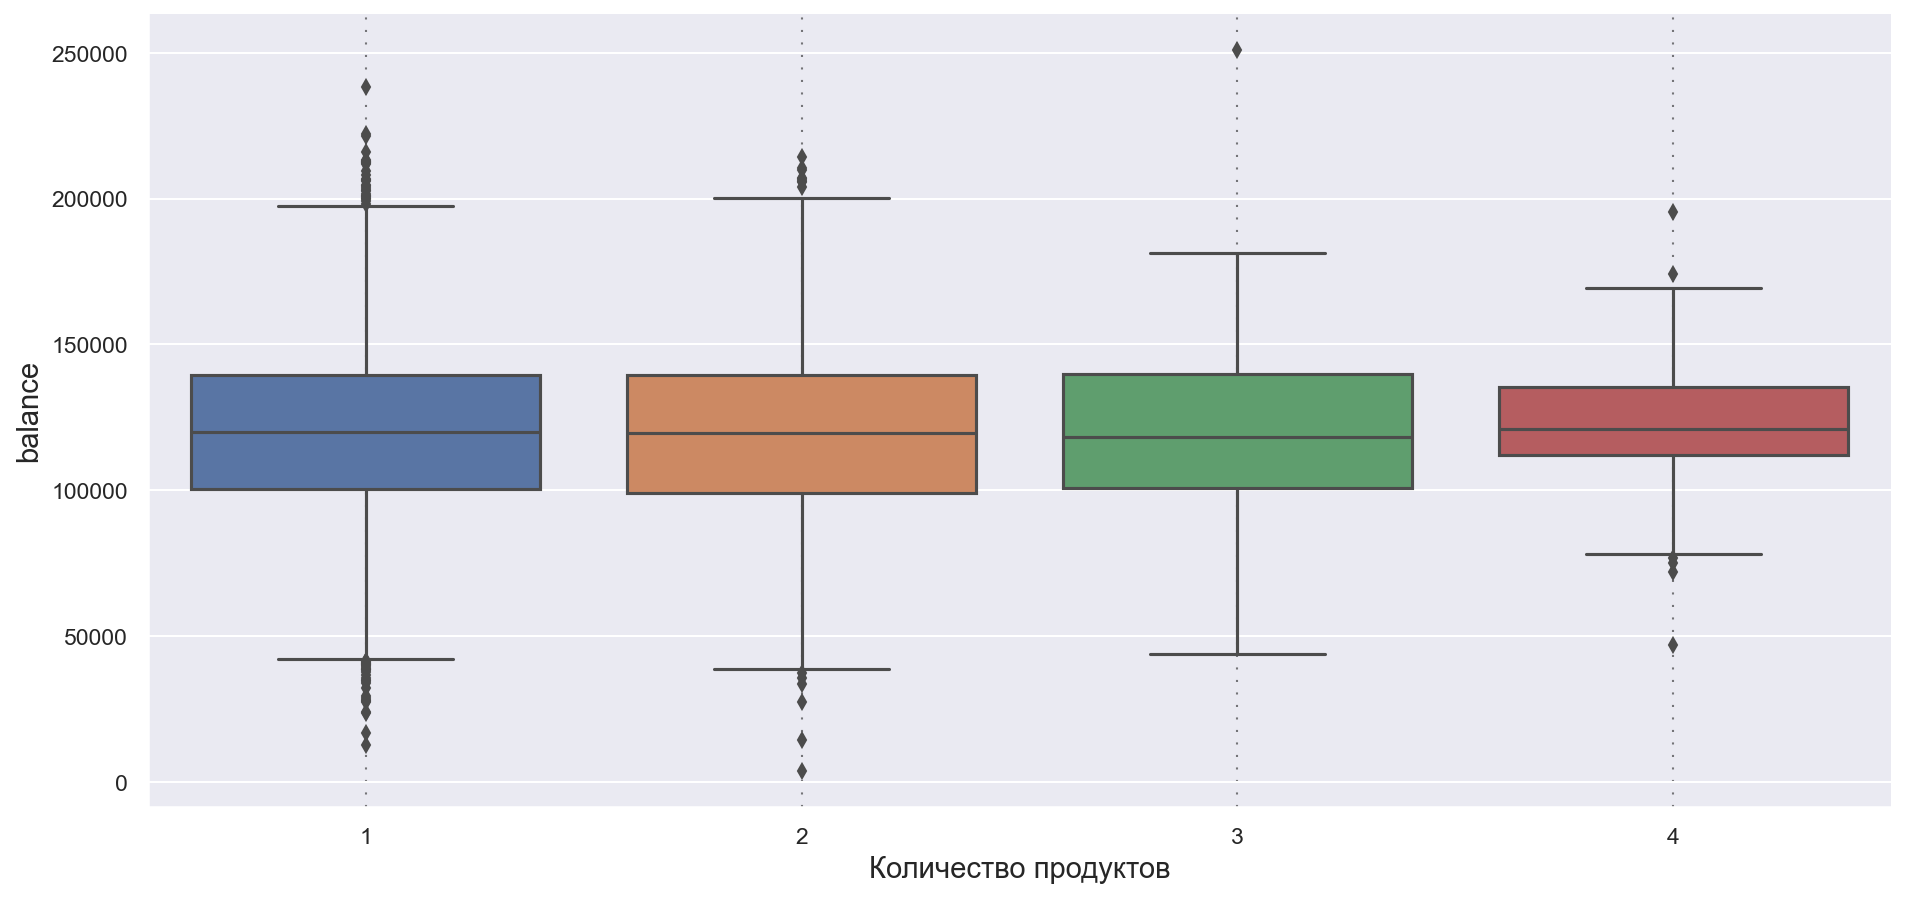

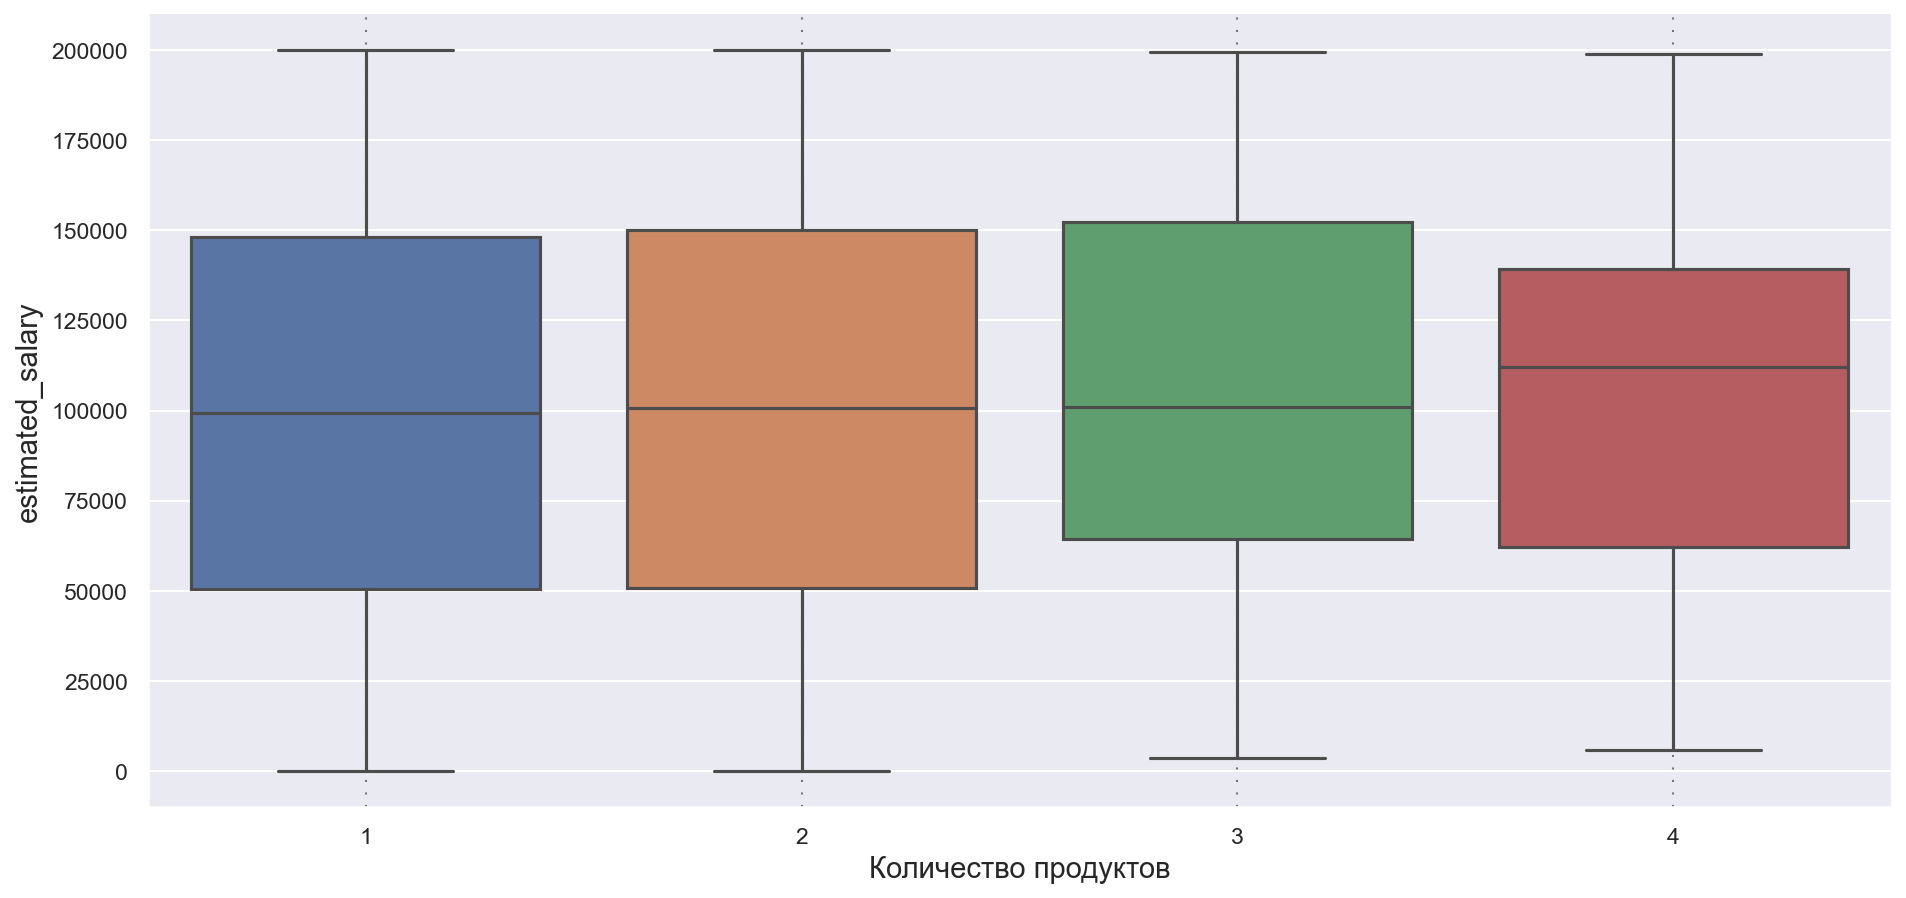

In [16]:
columns = ['score', 'age', 'objects', 'balance', 'estimated_salary']
for col in columns:
    fig = plt.figure(figsize=(15, 7), dpi=150)
    ax = sns.boxplot(x='products', y=col, data=bank_dataset)
    ax.grid(b=True, color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
    #ax.set_title('Данные по признаку: {}'.format(col), fontsize=16)
    ax.set_xlabel('Количество продуктов', fontsize=14)
    ax.set_ylabel(col, fontsize=14)
    sns.despine()
    plt.show()

<div class='alert alert-warning'>
В принципе тут применимы все комментарии которые были даны выше, но тут еще появилась проблема с наложением графиков и уже критичным становится проблема с шириной столбцов. Тебе нужно другую функцию для отрисовки использовать, воспользуйся галереей примеров библиотеки seaborn, там есть шаблоны графиков которые тебе подойдут.

<span style="color:blue">Диапазон значений баллов кредитного скоринга приблизительно одинаков для всех сегментов пользователей. Однако у клиентов с четырьмя и тремя продуктами этот показатель сгруппирован плотнее и чуть выше, чем у двух ругих сегментов.

<span style="color:blue">Разброс по возрасту говорит о том, что в первых двух сегментах клиенты в большинстве моложе тех, кто пользуется тремя или четырься продуктами.
    
<span style="color:blue">В среднем, количество объектов во владении у клиентов во всех сегментах одинаковое - пять. Но можно заметить, что среди клиентов с тремя и четырьмя продуктами встречаются и такие, которые имеют больше объектов в собственности, чем пользователи первых двух сегментов.
    
<span style="color:blue">Среднее значение баланса у клиентов всех сегментов примерно одинаковое. Однако, как и с баллами скоринга, у клиентов с четырьмя продуктами этот показатель сгруппирован плотнее и чуть выше, чем у остальных.
    
<span style="color:blue">Средняя заработная плата у клиентов из первых трёх сегментов примерно одинаковая, у четвёртого - чуть выше. Однако, границы разбросов отличаются: среди клиентов третьего сегмента (как и у первых двух) встречаются люди с заработком большим, чем у клиентов из четвертого, а также, нижняя граница третьего и четвертого сегментов выше, чем у первых двух, что говорит, о лучшем благосостоянии клиентов с тремя и четырьмя продуктами.

<div style="border:solid Blue 2px; padding: 10px">
<h3> Вывод <a class="tocSkip"> </h3>
    
<br/>
    
<li>Основная часть клиентов во всех городах региона пользуется одним или двумя банковскми продуктами.</li>
    
<li>Одним или двумя продуктами чаще пользуются клиенты моложе 40 лет, когда более старшее поколение имеет в пльзовании три или четыре банковских продукта.</li>
    
<li>Существует зависимость между количеством объектов во владении у клиента и количеством исползуемых им продуктов - скорее всего, это ипотечные кредиты.</li>
    
<li>Клиенты, имеющие больше двух банковских продуктов имеют более высокий скоринг, но при этом всегда находятся в оттоке - это подтверждает предположение об ипотечных займах.</li>

<li>В группе с тремя и четырьмя продуктами в пользовании больше женщин, чем мужчин.</li>
    
<li>Все клиент банка являются активными пользователями кредитных карт.</li>
    
<br/>

## Формулировка и проверка статистических гипотез
<a id='8'></a>
### Гипотеза № 1 (о различии дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним)
[*Назад к оглавлению*](##Оглавление)

<span style="color:blue">Для начала проверим данные на нормальность распределения внутри групп клиентов с одним и двумя продуктами. Для этого применим критерий Шапиро-Уилка.
<span style="color:blue">Для этой проверки нулевая гипотеза (**H<sub>0</sub>**) будет: "Данные распрелены нормально". Следовательно альтернативная гипотеза (**H<sub>1</sub>**) будет звучать как: "Распределение данных не нормально".

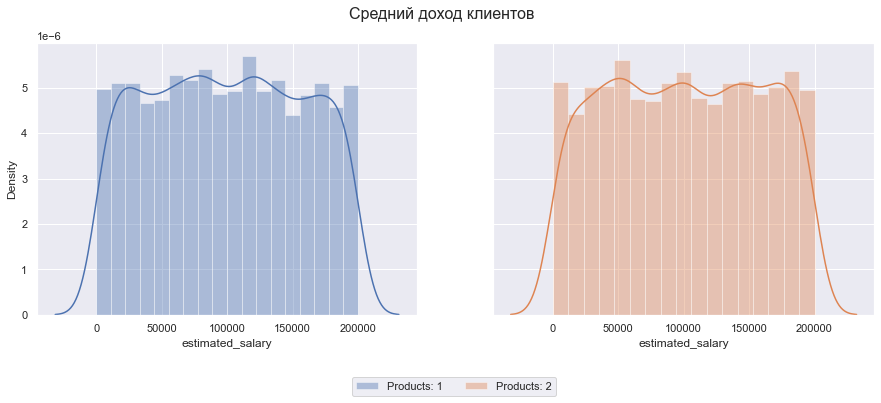

p-значение:  3.017243029368968e-36
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  2.1702722294315505e-35
Отвергаем нулевую гипотезу: распределение не нормально


In [17]:
# Из таблици со статистикой по пользователям выделим два датасета с зарплатами клиентов по группам по количеству продуктов
product_1 = bank_dataset.loc[bank_dataset.loc[:,'products'] == 1]['estimated_salary']
product_2 = bank_dataset.loc[bank_dataset.loc[:,'products'] == 2]['estimated_salary']

# Отобразим распреления зарплат по группам
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Средний доход клиентов', fontsize=16)
sns.distplot(a = product_1, color="#4c72b0" , ax=axes[0], label='Products: 1')
sns.distplot(a = product_2, color="#de8452" , ax=axes[1], label='Products: 2')
fig.legend(bbox_to_anchor=(0.511, -0.1), loc='lower center', ncol=4, borderaxespad=0)

plt.show()

alpha = 0.05  # критический уровень статистической значимости
products = [product_1, product_2]
for i in products:
    results = st.shapiro(i)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

<span style="color:blue">P-value для для обеих совокупностей сильно меньше критического уровня статистической значимости, а значит, что данные в обеих совокупностях распределены не нормально. Поэтому возпользуемся непараметрическим тестом *st.mannwhitneyu()*.

<span style="color:blue">Нулевой гипотезой (**H<sub>0</sub>**) объявим "Различие в распределении признака дохода клиентов , которые пользуются двумя продуктами банка, и теми, которые пользуются одним - НЕ имеет статистической значимости".

<span style="color:blue">Следовательно, сформулируем альтернативную гипотезу (**H<sub>1</sub>**): "Различие в распределении признака дохода клиентов , которые пользуются двумя продуктами банка, и теми, которые пользуются одним - статистически значима".

Критический уровень статистической значимости (*alpha*) зададим 5%.

**Если полученный уровень значимости, на котором находятся друг от друга средние значения двух датасетов будет меньше критического, отвергнем нулевую гипотезу (**H<sub>0</sub>**)**.

In [18]:
# Зададим критический уровень статистической значимости
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(bank_dataset.query('products == 1')['estimated_salary'], bank_dataset.query('products == 2')['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.20397833259638254
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Статистически значимых различий в среднем доходе нет. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в доходе есть различия, нет.

### Гипотеза № 2 (о различии дохода между теми клиентами, которые пользуются двумя двумя и менее продуктами банка, и теми, которые используют более двух)
<a id='9'></a>
[*Назад к оглавлению*](##Оглавление)

<span style="color:blue">Проверим данные на нормальность распределения внутри групп клиентов с одним-двумя и тремя-четырьмя продуктами. Для этого применим критерий Шапиро-Уилка.
<span style="color:blue">Для этой проверки нулевая гипотеза (**H<sub>0</sub>**) будет: "Данные распрелены нормально". Следовательно альтернативная гипотеза (**H<sub>1</sub>**) будет звучать как: "Распределение данных не нормально".

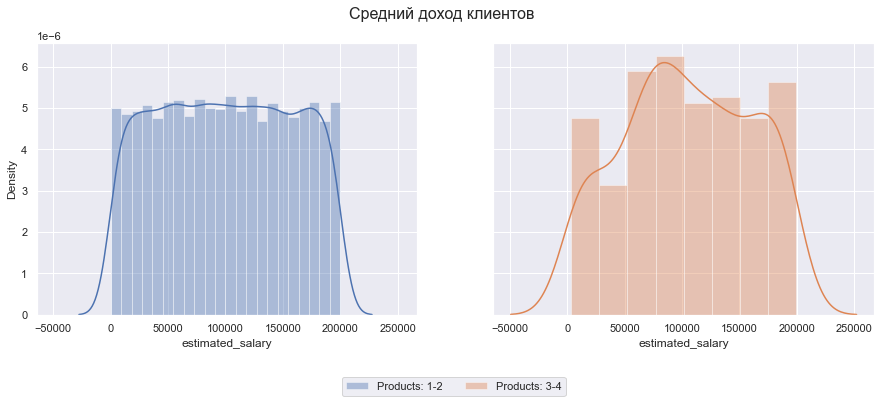

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  1.3171872126349626e-07
Отвергаем нулевую гипотезу: распределение не нормально


In [19]:
# Из таблици со статистикой по пользователям выделим два датасета с зарплатами клиентов по группам по количеству продуктов
product_12 = bank_dataset.query('products < 3')['estimated_salary']
product_34 = bank_dataset.query('products > 2')['estimated_salary']

# Отобразим распреления зарплат по группам
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Средний доход клиентов', fontsize=16)
sns.distplot(a = product_12, color="#4c72b0" , ax=axes[0], label='Products: 1-2')
sns.distplot(a = product_34, color="#de8452" , ax=axes[1], label='Products: 3-4')
fig.legend(bbox_to_anchor=(0.511, -0.1), loc='lower center', ncol=4, borderaxespad=0)

plt.show()

alpha = 0.05  # критический уровень статистической значимости
products = [product_12, product_34]
for i in products:
    results = st.shapiro(i)
    p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

<span style="color:blue">P-value для для обеих совокупностей сильно меньше критического уровня статистической значимости, а значит, что данные в обеих совокупностях распределены не нормально. Поэтому возпользуемся непараметрическим тестом *st.mannwhitneyu()*.
    
<span style="color:blue">Нулевой гипотезой (**H<sub>0</sub>**) объявим "Различие в распределении признака дохода клиентов , которые пользуются одним или двумя продуктами банка, и теми, которые пользуются более двух - НЕ имеет статистической значимости".

<span style="color:blue">Следовательно, сформулируем альтернативную гипотезу (**H<sub>1</sub>**): "Различие в распределении признака дохода клиентов , которые пользуются одним или двумя продуктами банка, и теми, которые пользуются более двух - статистически значима".

Критический уровень статистической значимости (*alpha*) зададим 5%.

**Если полученный уровень значимости, на котором находятся друг от друга средние значения двух датасетов будет меньше критического, отвергнем нулевую гипотезу (**H<sub>0</sub>**)**.

In [20]:
# Зададим критический уровень статистической значимости
alpha = 0.05    # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу

result = st.mannwhitneyu(bank_dataset.query('products < 3')['estimated_salary'], bank_dataset.query('products > 2')['estimated_salary']) 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  1.3171872126349626e-07
Отвергаем нулевую гипотезу: разница статистически значима


Статистически значимых различий в среднем доходе нет. P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем доходе есть различия, нет.

<div style="border:solid Blue 2px; padding: 10px">
<h3> Вывод <a class="tocSkip"> </h3>
    
<br/>
    
Проверка статистических гипотез показала, что:
<ul>
<li>статистически значимых различий между средним доходом клиентов, использующих один банковский продукт, и клиентов, использующих два банковских продукта - нет;</li>
<li>статистически значимых различий между средним доходом клиентов, использующих один или два банковских продукта, и клиентов, использующих более двух банковских продуктов - нет.</li>
<br/>

<div class='alert alert-warning'>
У тебя нет проверки предпоссылок для выбора стат теста, также тест Стъюдента не является прдепочтительным для равномерно распределенных данных. Чтобы проверка гипотез была в полной мере правильной тебе нужно начать с проверки данных на нормальность, далее проверить равенство дисперсий (жетально тоже стат тестом) и потом уже если все условия выполнились выбрать тест Стъюдента. Иначе тебе нужно выбрать другой тест и соответсвенно немного иначе сформулировать гипотезу тк каждый критерий проверяет что-то свое, не везде идет проверка равенства средних.

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Да, согласна с тобой. Что-то я тупанула. Странно, что комментарий тут не красный. Поправила.
</div>

<div class='alert alert-success'>
Выглядит весьма профессионально, но гипотезу лучше вормулировать не как "Разница в признаке А в двух когортах", а как "Различие в распределении признака А в когортах..."

<div class="alert alert-info"> <b>Комментарий студента v3:</b> Принято и поправлено.
</div>

## Общий вывод и рекомендации
<a id='10'></a>
[*Назад к оглавлению*](##Оглавление)

<div style="border:solid Red 2px; padding: 40px">    
    
<br/>
   
<li>Рассмотрев данные клиентов регионального банка в разрезе сегментов по количеству используемых банковских продуков в целом и по отдельным городам региона, можно сделать следующие выводы:</li>
<ol>
<li>основная часть клиентов во всех городах региона пользуется одним или двумя банковскими продуктами;</li>
    
<li>одним или двумя продуктами чаще пользуются клиенты моложе 40 лет, когда более старшее поколение имеет в пльзовании три или четыре банковских продукта;</li>
    
<li>существует зависимость между количеством объектов во владении у клиента и количеством исползуемых им продуктов - скорее всего, это ипотечные кредиты;</li>
    
<li>клиенты, имеющие больше двух банковских продуктов имеют более высокий скоринг, но при этом всегда находятся в оттоке - это подтверждает предположение об ипотечных займах у людей старшего возраста с несколькими объектами во владении: они надежные клиенты, выплачивающие кредиты без просрочек, но перестают быть заинтересованы в дополнительных кредитах после их выплаты или рефинансирутся в других банках на более выгодных условиях;</li>

<li>в группе с тремя и четырьмя продуктами в пользовании больше женщин, чем мужчин - согласно результатм исследования интернет-ресурса "Авито. Недвижимость" (<a>статья ТАСС https://tass.ru/nedvizhimost/7367925</a>, которая ссылается на это исследование), женщины чаще мужчин берут ипотеку, что кореллирует с данными предоставленными Объединённым кредитным бюро для журнала "Forbes"(<a>https://www.forbes.ru/forbes-woman/394005-bez-muzha-no-s-ipotekoy-na-chto-zhenshchiny-berut-kredity-i-kak-ih-vyplachivayut</a>): в большинстве случаев женщины берут кредиты в возрасте от 30 до 45 лет, мужчины - от 31 года до 36 лет - такую картину мы видим и данных датасета;</li>
    
<li>все клиент банка являются активными пользователями кредитных карт, но клиенты чаще встречаются в группах с одним или двумя продуктами - как мы уже выяснили, чаще - это молодые мужчины;</li>
    
<li>уровень заработной платы клиента имеет прямопропорциональную зависимость с количеством используемых банковских продуктов, однако, как показала проверка статистических гипотез, разнича между средним значением зарплаты клиентов по группам не имеет статистической значимости;</li>
    
<li>в Ростове Великом показатели по оттоку хуже значительнее по каждой группе: отток в группах с одним и двумя продуктами в 1,5 раза выше средних показателей по всем городам.</li>
</ol>
       
<br/>
    
<li>В текущей ситуации, возможно, будет целесообразно:</li>
<ol>
<li>предлагать дополнительные продукты клиентам с одним продуктом, <span style="color:blue">такие как кэшбек-системы, накопительные или инвестиционные счета;</li>
    
<li>поддерживать активность и лояльность клиентов с двумя продуктами, уведомлять о спецпредложениях по кредитной / дебетовой карте, <span style="color:blue">повышать процент по кэшбеку или накомплениям при открытии дополнительных продуктов;</li>
    
<li>клиентам с тремя и четырьмя продуктами предлагать рефинансирование и объединение нескольких кредитов в один внутри банка на выгодных условиях, как надежным заёмщикам.</li>
</ol>

<div class='alert alert-warning'>
Выводы весьма детальные, очень круто решила еще дополнительно изучить аналитическую информацию для проверки адекватности выводов. Единственное что можно улучшить это рекомендации. Хочется видеть более персонализированные рекомендации в виде конкретных продуктов для каждой аудитории. Пофантазируй на тему того какие продукты могут заинтересовать клиентов разного возраста. Среди банковских продуктов есть например дебетовы и кредитные карты, кешбек системы, накопительные и инвестиционные счета, страховые счета с возможностью инвестирования, зарплатные и пенсионные проекты, иппотечные и кредитные продукты.
    
Возвращайся с правками, презентацией и дашбородом :) 

<div class='alert alert-success'>
Спасибо за внесенные правки, с тобой было очень приятно работать. Очень похвально что ты так стремишься разобраться в материале. Ты хорошо постаралась и твоя работа очень достойно выглядит. После окончания спринта я еще вернусь с более развернутой обратной связью. Делай презентацию, дашборд и присылай работу обратно.